In [1]:
# -- 4: Final Project Idea: Alalyzing Data --
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# -- 4.2 Importing Data --
df = pd.read_csv("exoplanet_data.csv", comment = "#")
df 
# The shape is (567, 92)
# There are 567 rows and 92 columns
print(df.columns)
# default_flag, pl_refname, pl_radelim, pl_insolerr1, st_logg

Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'soltype',
       'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2

In [17]:
# -- 4.3 Reducing Data --

# Planet Name: pl_name, planet name most commonly used in the literature, what the planet is commonly called or referred to
# Host Name: hostname, stellar name most commonly used in the literature, the name of the star that the planet orbits
# Discovery Method: discoverymethod, method by which the planet was first identified, how the planet was discovered
# Spectral Type: st_spectype, classification of the star based on their spectral characteristics following the Morgan-Keenan system, the class the star is in based on its surface temperature and determined by the absorbition lines in its spectrum	
# Equilibrium Temperature [K]: pl_eqt, The equilibrium temperature of the planet as modeled by a black body heated only by its host star, or for directly imaged planets, the effective temperature of the planet required to match the measured luminosity if the planet were a black body, when the star is in hydrostatic equilibrium, meaning that the inward force of gravity is balanced with outward pressure
# Planet Mass of Mass*sin(i) [Jupiter Mass]: pl_bmassj, Minimum mass of a planet as measured by radial velocity, measured in units of masses of Jupiter, the minimum mass of a planet that is measured in units of masses of Jupiter

database_column_names = [
    'pl_name',
    'hostname',
    'discoverymethod',
    'st_spectype',
    'pl_eqt',
    'pl_bmassj'
]
small_df = df[database_column_names]

small_df = small_df.dropna()
print(small_df)
# 6)
# The shape is (67, 6)
# There are 67 rows and 6 columns
print(df.head(5)) 
print(df.tail(5))
print(df.columns)

         pl_name   hostname  discoverymethod st_spectype  pl_eqt  pl_bmassj
2       DMPP-1 b     DMPP-1  Radial Velocity        F8 V   877.0   0.076362
3       DMPP-1 c     DMPP-1  Radial Velocity        F8 V  1239.0   0.030205
4       DMPP-1 d     DMPP-1  Radial Velocity        F8 V  1632.0   0.010540
5       DMPP-1 e     DMPP-1  Radial Velocity        F8 V  1314.0   0.012994
6       DMPP-2 b     DMPP-2  Radial Velocity        F5 V  1000.0   0.437000
..           ...        ...              ...         ...     ...        ...
546   WASP-185 b   WASP-185          Transit        G0 V  1160.0   0.980000
549   WASP-190 b   WASP-190          Transit     F6 IV-V  1500.0   1.000000
555   WASP-192 b   WASP-192          Transit        G0 V  1620.0   2.300000
561       XO-7 b       XO-7          Transit        G0 V  1743.0   0.709000
566  eps Ind A b  eps Ind A  Radial Velocity        K5 V   275.0   6.310000

[67 rows x 6 columns]
    pl_name hostname  default_flag  sy_snum  sy_pnum  discoveryme

discoverymethod
Transit                      388
Radial Velocity              107
Microlensing                  61
Imaging                        5
Transit Timing Variations      3
Eclipse Timing Variations      2
Disk Kinematics                1
Name: count, dtype: int64


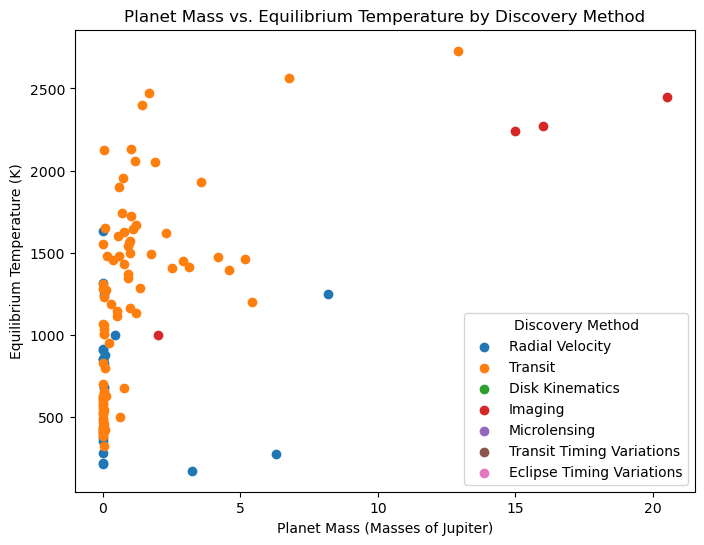

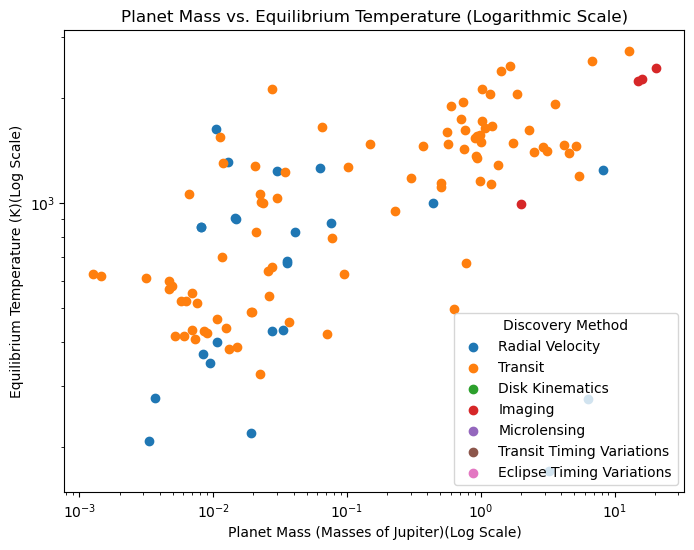

pl_name                                                  eps Ind A b
hostname                                                   eps Ind A
default_flag                                                       1
sy_snum                                                            3
sy_pnum                                                            1
discoverymethod                                      Radial Velocity
disc_year                                                       2019
disc_facility                                   La Silla Observatory
soltype                                          Published Confirmed
pl_controv_flag                                                    0
pl_refname         <a refstr=MATTHEWS_ET_AL__2024 href=https://ui...
pl_orbper                                                        NaN
pl_orbpererr1                                                    NaN
pl_orbpererr2                                                    NaN
pl_orbperlim                      

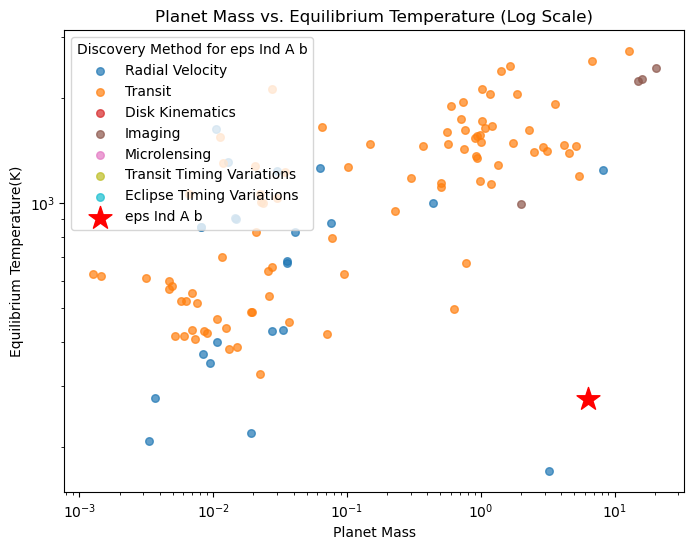

In [43]:
# -- 4.4: Analyze Data --
# 1)
discovery_method_counts = df['discoverymethod'].value_counts()
print(discovery_method_counts)
# The different discovery methods are transit, radial velocity, microlensing, imaging, transit timing variations, eclipse timing variations, and disk kinematics
# There are 388, 107, 61, 5, 3, 2, and 1 of each. Transit has the most and disk kinematics has the least.
# Transit: observing the slight, periodic dimming of a star's light as a planet passes in front of it (transits) from our perspective
# Radial Velocity: detecting a star's "wobble" caused by a planet's gravitational tug, observed as periodic Doppler shifts in its light
# Microlensing: when a foreground star with a planet passes almost perfectly in front of a more distant, background star, causing the foreground star's gravity to bend the background star's light, acting like a lens and temporarily magnifying it
# Imaging: using advanced telescopes and techniques like coronagraphs to block starlight, allowing faint planetary light (especially infrared) to be seen, and adaptive optics to correct atmospheric blurring
# Transit Timing Variations: noticing tiny shifts in the predictable timing of a known planet's transit across its star, caused by gravitational tugs from unseen, nearby planets
# Eclipse Timing Variations: observing periodic dips in a star's brightness (transits) and noticing when these dips occur earlier or later than expected
# Disk Kinematics: using powerful telescopes like ALMA to map gas & dust motion in protoplanetary disks, looking for disturbances

# 2)
plt.figure(figsize=(8,6))

methods = df['discoverymethod'].unique()
for method in methods:
    subset = df[df['discoverymethod'] == method]
    plt.scatter(subset['pl_bmassj'], subset['pl_eqt'], label=method)

plt.title("Planet Mass vs. Equilibrium Temperature by Discovery Method")
plt.xlabel("Planet Mass (Masses of Jupiter)")
plt.ylabel("Equilibrium Temperature (K)")
plt.legend(title="Discovery Method")

plt.show()

# 3)
fig_log, ax_log = plt.subplots(figsize=(8,6))

for method in methods:
    subset = df[df['discoverymethod'] == method]
    ax_log.scatter(subset['pl_bmassj'], subset['pl_eqt'], label=method)

ax_log.set_xscale('log')
ax_log.set_yscale('log')

ax_log.set_title("Planet Mass vs. Equilibrium Temperature (Logarithmic Scale)")
ax_log.set_xlabel("Planet Mass (Masses of Jupiter)(Log Scale)")
ax_log.set_ylabel("Equilibrium Temperature (K)(Log Scale)")
ax_log.legend(title="Discovery Method")

plt.show()

# 4) based on my plots, exoplanets found by the imaging method are more likely to be massive.

# 5)
large_planets = df[df['pl_bmassj'] > 5]
if not large_planets.empty:
    coldest_largest_planet = large_planets.loc[large_planets['pl_eqt'].idxmin()]
    pd.set_option('display.max_rows', None)
    print(coldest_largest_planet)

# 6) 
# Its name is eps Ind A b, its index is 566, its equilibrium temperature is 275, it is 6.31 Jupiter masses, it is orbiting a type K5, which not Sun like.

# 7)
def plot_scatter_log(df, coldest_largest_planet):
    fig, ax = plt.subplots(figsize=(8,6))
    methods = df['discoverymethod'].unique()


    for i, method in enumerate(methods):
        subset = df[df['discoverymethod'] == method]
        ax.scatter(subset['pl_bmassj'], subset['pl_eqt'], label=method, color=colors(i/len(methods)), alpha=0.7, s=30)

    ax.scatter(coldest_largest_planet['pl_bmassj'], 
               coldest_largest_planet['pl_eqt'], 
               color='red', marker='*', s=300, label=f"{coldest_largest_planet['pl_name']}", zorder=5)

    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.title('Planet Mass vs. Equilibrium Temperature (Log Scale)')
    plt.xlabel('Planet Mass')                                                                                            
    plt.ylabel('Equilibrium Temperature(K)')
    plt.legend(title='Discovery Method for eps Ind A b', loc='upper left')
    plt.show()

plot_scatter_log(df, coldest_largest_planet)

In [44]:
# -- 4.5 Check Your Answer --
# The title is "A temperate super-Jupiter imaged with JWST in the mid-infrared"

# Summary: Eps Ind A is a K5V star that is about solar age.
# This exoplanet orbiting a star nearby is thought of to be a giant planet due to its long-term raidial-velocity trend and its astrometric acceleration.
# There is a new planet from JWST images that reveals a giant planet consistint with those claims but incosistant with its properties that were previously stated.
# This new planet is very bright and has a temperature of about 275 K. 
# Data indicates that this planet is most likely the only giant in its system.

# This planet is special becuase it is giant! 

# The mass and equilibrium temperature do match with what the paper reported.